##Age and Gender Classification Using Convolutional Neural Networks - Demo

This code is released with the paper:

Gil Levi and Tal Hassner, "Age and Gender Classification Using Convolutional Neural Networks," IEEE Workshop on Analysis and Modeling of Faces and Gestures (AMFG), at the IEEE Conf. on Computer Vision and Pattern Recognition (CVPR), Boston, June 2015

If you find the code useful, please add suitable reference to the paper in your work.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#caffe_root = './caffe/' 
import sys
#sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Loading the mean image

In [2]:
path = './models/'
mean_filename=path+'./mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

## Loading the age network

In [3]:
pathage = './age_net_definitions/'
age_net_pretrained=path+'./age_net.caffemodel'
age_net_model_file=pathage+'./deploy.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(1, 3, 227, 227)


/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


## Loading the gender network

In [5]:
pathgender = './gender_net_definitions/'
gender_net_pretrained=path+'./gender_net.caffemodel'
gender_net_model_file=pathgender+'./deploy.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(10, 3, 227, 227)


## Labels

In [6]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

## Reading and plotting the input image

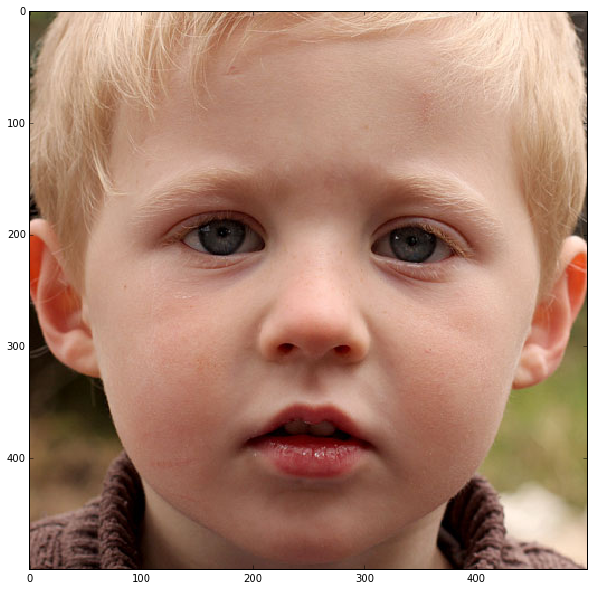

In [8]:
example_image = './example_image.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

## Age prediction

In [9]:
prediction = age_net.predict([input_image]) 

print 'predicted age:', age_list[prediction[0].argmax()]

predicted age: (0, 2)


## Gender prediction

In [10]:
prediction = gender_net.predict([input_image]) 

print 'predicted gender:', gender_list[prediction[0].argmax()]

predicted gender: Male


# Filters visualizations

Based on a similar notebook by Caffe's authors.

In [11]:
def showimage(im):
    if im.ndim == 3:
        im = im[:, :, ::-1]
    plt.set_cmap('jet')
    plt.imshow(im,vmin=0, vmax=0.3)
    

def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    showimage(data)

### Input image

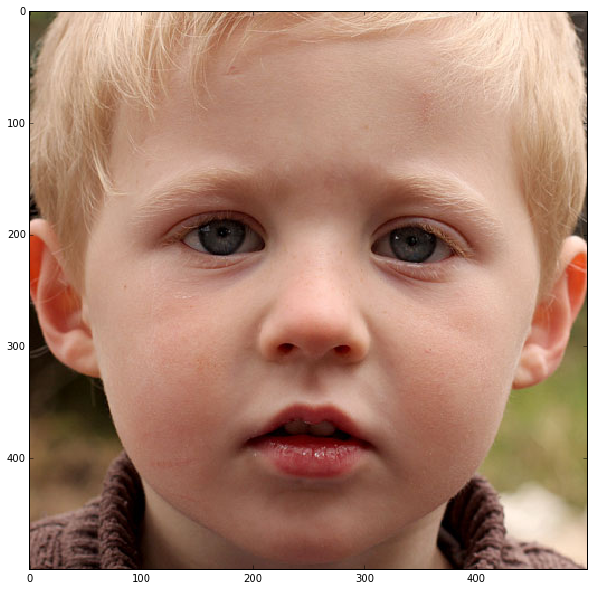

In [12]:
_ = plt.imshow(input_image)

###The first conv layer filters, `conv1`
Notice some filters resemble edge detector filters

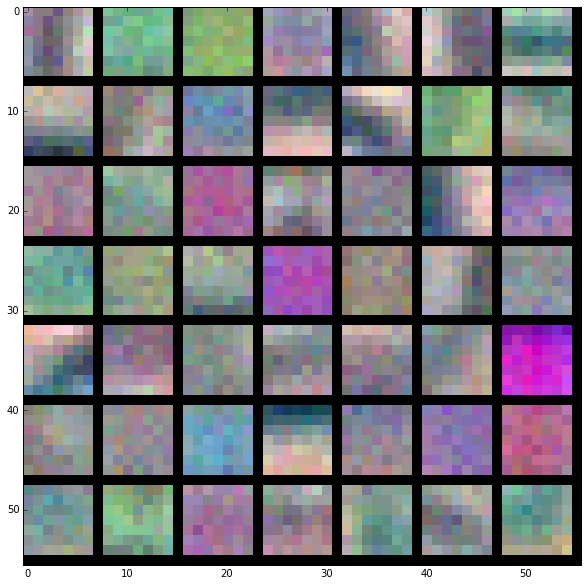

In [13]:
filters = age_net.params['conv1'][0].data[:49]
vis_square(filters.transpose(0, 2, 3, 1))

### The first Conv layer output, `conv1` (rectified responses of the filters above)
Notice the response of specific filters, e.g. the onese that resemble edge detectors 

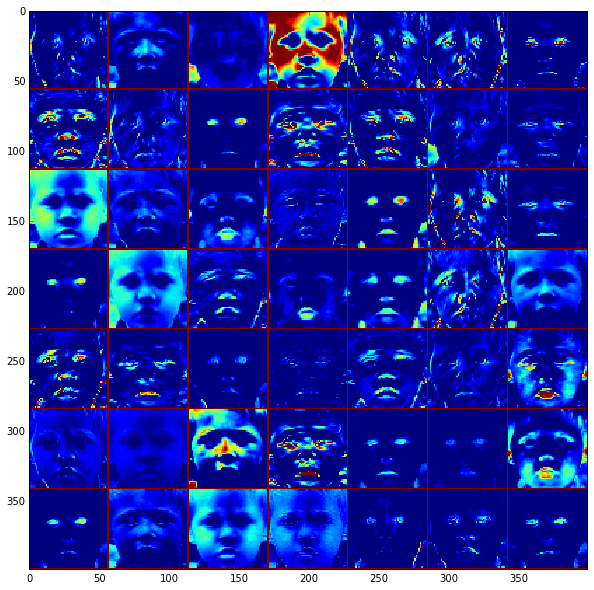

In [16]:
feat = age_net.blobs['conv1'].data[0, :49]
vis_square(feat, padval=1)

Copyright 2015, Gil Levi and Tal Hassner

The SOFTWARE provided in this page is provided "as is", without any guarantee made as to its suitability or fitness for any particular use. It may contain bugs, so use of this tool is at your own risk. We take no responsibility for any damage of any sort that may unintentionally be caused through its use.